In [1]:
# data processing
import numpy as np
import pandas as pd
import re
#visiulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
train = pd.read_csv('/home/baitong/Data/all/train.csv')
test = pd.read_csv('/home/baitong/Data/all/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.describe(include=['O'])#['O'] indicates category feature

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Turkula, Mrs. (Hedwig)",male,1601,B96 B98,S
freq,1,577,7,4,644


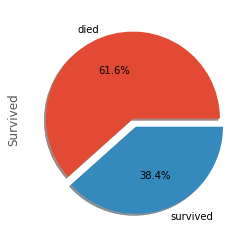

In [6]:
survive_num = train.Survived.value_counts()
survive_num.plot.pie(explode=[0,0.1],autopct='%1.1f%%',labels=['died','survived'],shadow=True)
plt.show()


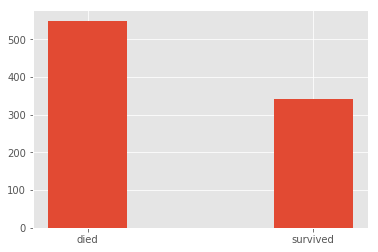

In [7]:
x=[0,1]
plt.bar(x,survive_num,width=0.35)
plt.xticks(x,('died','survived'))
plt.show()

In [8]:
num_f = [f for f in train.columns if train.dtypes[f] != 'object']
cat_f = [f for f in train.columns if train.dtypes[f]=='object']
print('there are %d numerical features:'%len(num_f),num_f)
print('there are %d category features:'%len(cat_f),cat_f)

there are 7 numerical features: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
there are 5 category features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [9]:
train.groupby(['Sex'])['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

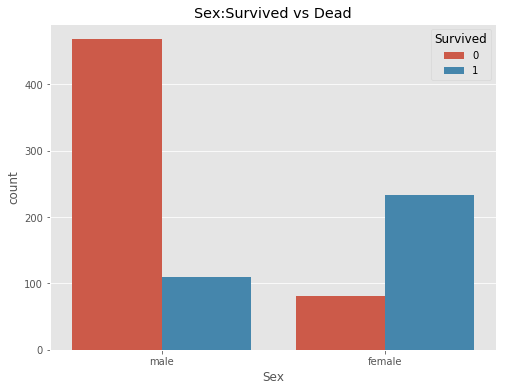

In [10]:
f,ax = plt.subplots(figsize=(8,6))
fig = sns.countplot(x='Sex',hue='Survived',data=train)
fig.set_title('Sex:Survived vs Dead')
plt.show()

In [11]:
train.groupby(['Sex'])['Survived'].sum()/train.groupby(['Sex'])['Survived'].count()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

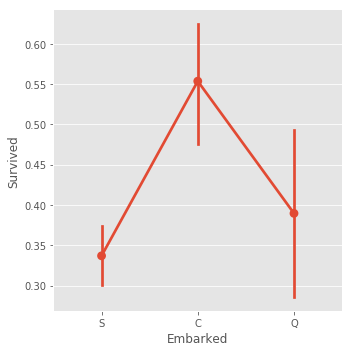

In [12]:
sns.catplot('Embarked','Survived',data=train,kind = 'point')
plt.show()

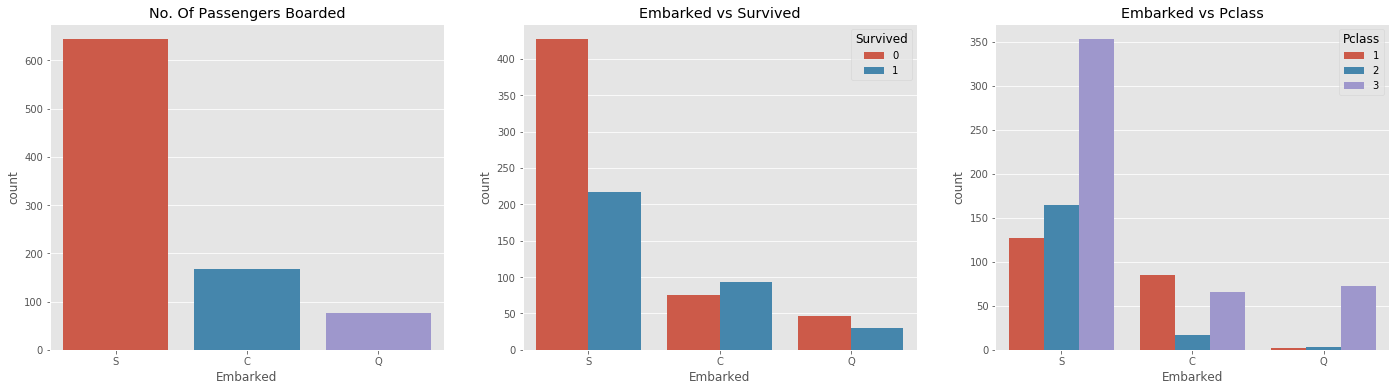

In [13]:
f,ax = plt.subplots(1,3,figsize=(24,6))
sns.countplot('Embarked',data=train,ax=ax[0])
ax[0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[2])
ax[2].set_title('Embarked vs Pclass')
#plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

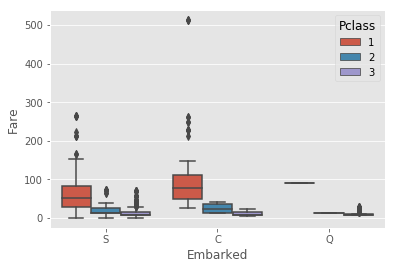

In [14]:
#pd.pivot_table(train,index='Embarked',columns='Pclass',values='Fare')
sns.boxplot(x='Embarked',y='Fare',hue='Pclass',data=train)
plt.show()

In [15]:
train.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

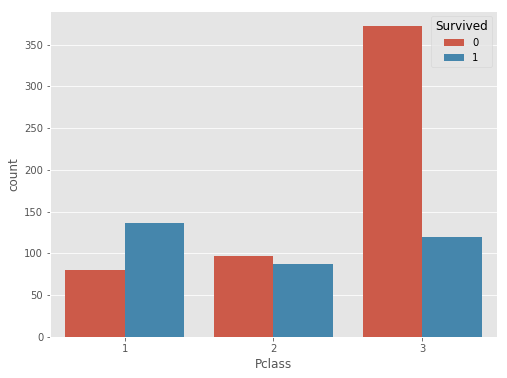

In [16]:
plt.subplots(figsize=(8,6))
f = sns.countplot('Pclass',hue='Survived',data=train)

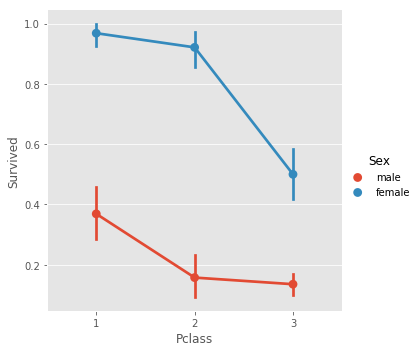

In [17]:
sns.catplot('Pclass','Survived',hue='Sex',data=train,kind = 'point')
plt.show()

In [18]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


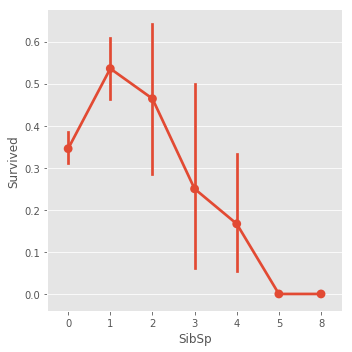

In [19]:
sns.catplot('SibSp','Survived',data=train,kind = 'point')
plt.show()

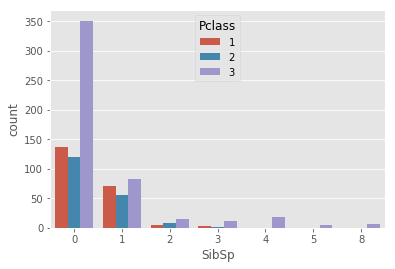

In [20]:
#pd.pivot_table(train,values='Survived',index='SibSp',columns='Pclass')
sns.countplot(x='SibSp',hue='Pclass',data=train)
plt.show()

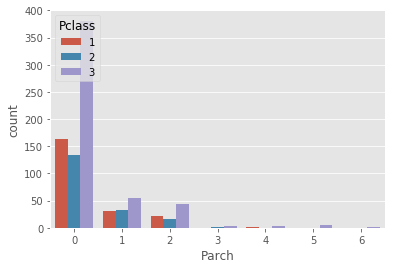

In [21]:
#pd.pivot_table(train,values='Survived',index='Parch',columns='Pclass')
sns.countplot(x='Parch',hue='Pclass',data=train)
plt.show()

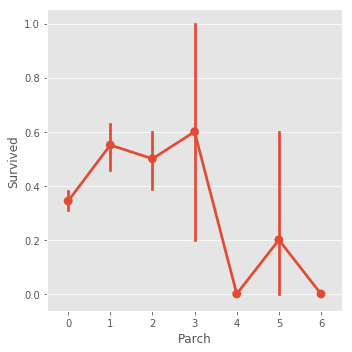

In [22]:
sns.catplot('Parch','Survived',data=train, kind = "point")
plt.show()

In [23]:
train.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


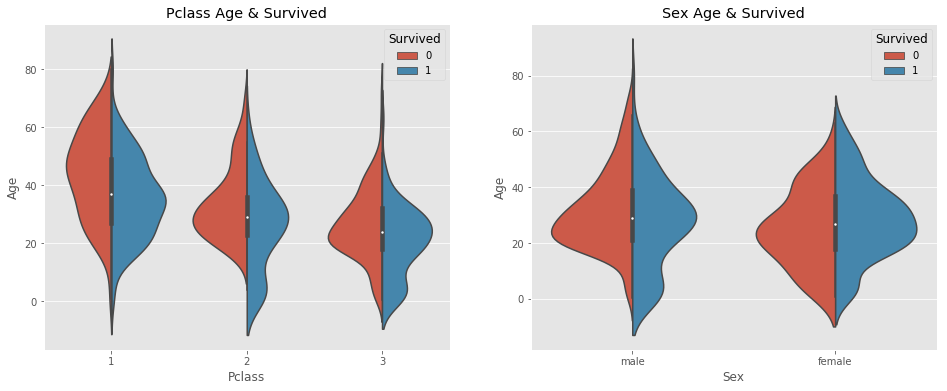

In [24]:
f,ax = plt.subplots(1,2,figsize=(16,6))
sns.violinplot('Pclass','Age',hue='Survived',data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass Age & Survived')
sns.violinplot('Sex','Age',hue='Survived',data=train,split=True,ax=ax[1])
ax[1].set_title('Sex Age & Survived')
plt.show()

In [25]:
#用正则表达式帮助找出姓名中表示年龄的title
def getTitle(data):

    name_sal = []
    for i in range(len(data['Name'])):
        name_sal.append(re.findall(r'.\w*\.',data.Name[i]))
    #print(name_sal)
    Salut = []
    for i in range(len(name_sal)):
        name = str(name_sal[i])
        name = name[1:-1].replace("'","")
        name = name.replace(".","").strip()
        name = name.replace(" ","")
        Salut.append(name)

    data['Title'] = Salut

getTitle(train)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


In [26]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [27]:
train.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

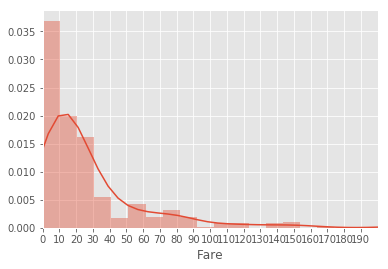

In [28]:
sns.distplot(train['Fare'].dropna())
plt.xlim((0,200))
plt.xticks(np.arange(0,200,10))
plt.show()

In [29]:
#合并训练集和测试集
passID = test['PassengerId']
all_data = pd.concat([train,test],keys=["train","test"])
all_data.shape
#all_data.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


(1309, 13)

In [30]:
all_data.drop(['PassengerId','Cabin'],axis=1,inplace=True)

In [31]:
all_data.head(2)

Age Embarked     Fare  \
train 0  22.0        S   7.2500   
      1  38.0        C  71.2833   

                                                      Name  Parch  Pclass  \
train 0                            Braund, Mr. Owen Harris      0       3   
      1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0       1   

            Sex  SibSp  Survived     Ticket Title  
train 0    male      1       0.0  A/5 21171    Mr  
      1  female      1       1.0   PC 17599   Mrs

In [32]:
#先提取name中的title
getTitle(all_data)

In [33]:
pd.crosstab(all_data['Title'], all_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [34]:
all_data['Title'] = all_data['Title'].replace(
    ['Lady','Dr','Dona','Mme','Countess'],'Mrs')
all_data['Title'] =all_data['Title'].replace('Mlle','Miss')
all_data['Title'] =all_data['Title'].replace('Mrs,L','Mrs')
all_data['Title'] = all_data['Title'].replace('Ms', 'Miss')
#all_data['Title'] = all_data['Title'].replace('Mme', 'Mrs')
all_data['Title'] = all_data['Title'].replace(['Capt','Col','Don','Major','Rev','Jonkheer','Sir'],'Mr')
'''
all_data['Title'] = all_data.Title.replace({'Mlle':'Miss','Mme':'Mrs','Ms':'Miss','Dr':'Mrs',
                        'Major':'Mr','Lady':'Mrs','Countess':'Mrs',
                        'Jonkheer':'Mr','Col':'Mr','Rev':'Mr',
                        'Capt':'Mr','Sir':'Mr','Don':'Mr','Mrs,L':'Mrs'})

'''
all_data.Title.isnull().sum()

0

In [35]:
all_data[:train.shape[0]].groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.845638
Mr        32.891990
Mrs       36.188034
Name: Age, dtype: float64

In [36]:
#通过训练集中title对应的age均值替换
all_data.loc[(all_data.Age.isnull()) & (all_data.Title=='Mr'),'Age']=32
all_data.loc[(all_data.Age.isnull())&(all_data.Title=='Mrs'),'Age']=36
all_data.loc[(all_data.Age.isnull())&(all_data.Title=='Master'),'Age']=5
all_data.loc[(all_data.Age.isnull())&(all_data.Title=='Miss'),'Age']=22
#all_data.loc[(all_data.Age.isnull())&(all_data.Title=='other'),'Age']=46

all_data.Age.isnull().sum()

0

In [37]:
# print(all_data[:train.shape[0]])
all_data[:train.shape[0]][['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.158192
3,Mrs,0.777778


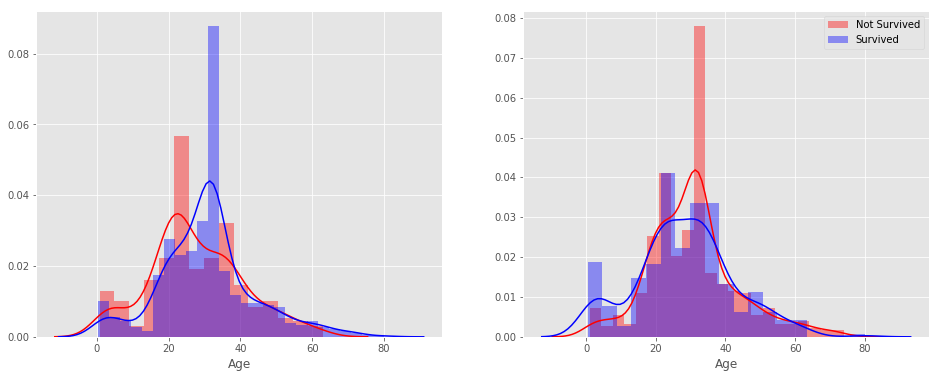

In [38]:
f,ax = plt.subplots(1,2,figsize=(16,6))
sns.distplot(all_data[:train.shape[0]].loc[all_data[:train.shape[0]].Sex=='female','Age'],color='red',ax=ax[0])
sns.distplot(all_data[:train.shape[0]].loc[all_data[:train.shape[0]].Sex=='male','Age'],color='blue',ax=ax[0])

sns.distplot(all_data[:train.shape[0]].loc[all_data[:train.shape[0]].Survived==0,'Age' ],
                 color='red', label='Not Survived', ax=ax[1])
sns.distplot(all_data[:train.shape[0]].loc[all_data[:train.shape[0]].Survived==1,'Age' ],
                 color='blue', label='Survived', ax=ax[1])
plt.legend(loc='best')
plt.show()

In [39]:
def male_female_child(passenger):
    # 取年龄和性别
    age,sex = passenger
    # 提出儿童特征
    if age < 16:
        return 'child'
    else:
        return sex
# 创建新特征
all_data['person'] = all_data[['Age','Sex']].apply(male_female_child,axis=1)

In [40]:
all_data['Age_band']=0
all_data.loc[all_data['Age']<=16,'Age_band']=0
all_data.loc[(all_data['Age']>16)&(all_data['Age']<=40),'Age_band']=1
all_data.loc[all_data['Age']>40,'Age_band']=2

In [41]:
df = pd.get_dummies(all_data['Title'],prefix='Title')
all_data = pd.concat([all_data,df],axis=1)

In [42]:
all_data.drop('Title',axis=1,inplace=True)

In [43]:
all_data.drop('Name',axis=1,inplace=True)

In [44]:
all_data.loc[all_data.Embarked.isnull()]

Age Embarked  Fare  Parch  Pclass     Sex  SibSp  Survived  \
train 61   38.0      NaN  80.0      0       1  female      0       1.0   
      829  62.0      NaN  80.0      0       1  female      0       1.0   

           Ticket  person  Age_band  Title_Master  Title_Miss  Title_Mr  \
train 61   113572  female         1             0           1         0   
      829  113572  female         2             0           0         0   

           Title_Mrs  
train 61           0  
      829          1

In [45]:
all_data['Embarked'].fillna('C',inplace=True)
all_data.Embarked.isnull().any()

False

In [46]:
embark_dummy = pd.get_dummies(all_data.Embarked)
all_data = pd.concat([all_data,embark_dummy],axis=1)
all_data.head(2)

Age Embarked     Fare  Parch  Pclass     Sex  SibSp  Survived  \
train 0  22.0        S   7.2500      0       3    male      1       0.0   
      1  38.0        C  71.2833      0       1  female      1       1.0   

            Ticket  person  Age_band  Title_Master  Title_Miss  Title_Mr  \
train 0  A/5 21171    male         1             0           0         1   
      1   PC 17599  female         1             0           0         0   

         Title_Mrs  C  Q  S  
train 0          0  0  0  1  
      1          1  1  0  0

In [47]:
#创造familysize和alone两个新特征
all_data['Family_size'] = all_data['SibSp']+all_data['Parch']#是所有亲属总和
all_data['alone'] = 0#不是一个人
all_data.loc[all_data.Family_size==0,'alone']=1#代表是一个人

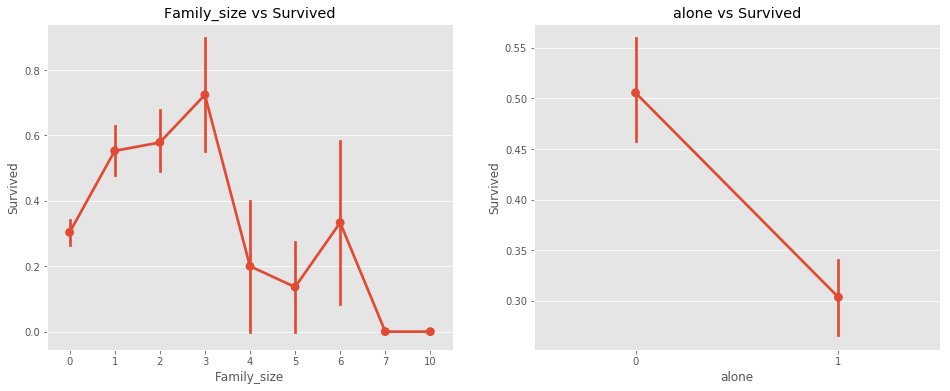

In [48]:
f,ax=plt.subplots(1,2,figsize=(16,6))
sns.catplot('Family_size','Survived',data=all_data[:train.shape[0]],ax=ax[0],kind='point')
ax[0].set_title('Family_size vs Survived')
sns.catplot('alone','Survived',data=all_data[:train.shape[0]],ax=ax[1],kind='point')
ax[1].set_title('alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

In [49]:
all_data['Family_size'] = np.where(all_data['Family_size']==0, 'solo',
                                    np.where(all_data['Family_size']<=3, 'normal', 'big'))

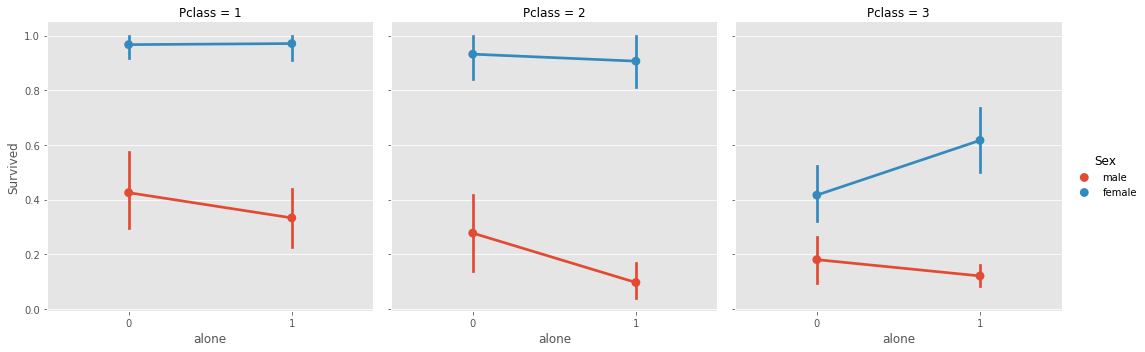

In [50]:
sns.catplot('alone','Survived',hue='Sex',data=all_data[:train.shape[0]],col='Pclass',kind = 'point')
plt.show()

In [51]:
all_data['poor_girl'] = 0
all_data.loc[(all_data['Sex']=='female')&(all_data['Pclass']==3)&(all_data['alone']==1),'poor_girl']=1

In [52]:
all_data.loc[(all_data.Fare.isnull()) & (all_data.Pclass==1),'Fare']=84
all_data.loc[(all_data.Fare.isnull()) & (all_data.Pclass==2),'Fare']=21
all_data.loc[(all_data.Fare.isnull()) & (all_data.Pclass==3),'Fare']=14

(0, 100)

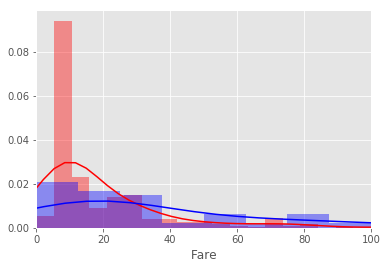

In [53]:
sns.distplot(all_data[:train.shape[0]].loc[all_data[:train.shape[0]].Survived==0,'Fare' ],
                 color='red', label='Not Survived')
sns.distplot(all_data[:train.shape[0]].loc[all_data[:train.shape[0]].Survived==1,'Fare' ],
                 color='blue', label='Survived')
plt.xlim((0,100))

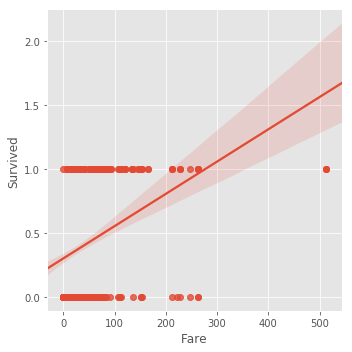

In [54]:
sns.lmplot('Fare','Survived',data=all_data[:train.shape[0]])
plt.show()

In [55]:
#Fare平均分成3段取均值
all_data['Fare_band'] = pd.qcut(all_data['Fare'],3)

all_data[:train.shape[0]].groupby('Fare_band')['Survived'].mean()

Fare_band
(-0.001, 8.662]    0.198052
(8.662, 26.0]      0.402778
(26.0, 512.329]    0.559322
Name: Survived, dtype: float64

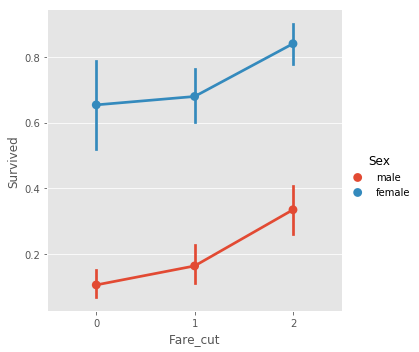

In [56]:
all_data['Fare_cut'] = 0
all_data.loc[all_data['Fare']<=8.662,'Fare_cut'] = 0
all_data.loc[((all_data['Fare']>8.662) & (all_data['Fare']<=26)),'Fare_cut'] = 1
#all_data.loc[((all_data['Fare']>14.454) & (all_data['Fare']<=31.275)),'Fare_cut'] = 2
all_data.loc[((all_data['Fare']>26) & (all_data['Fare']<513)),'Fare_cut'] = 2

sns.catplot('Fare_cut','Survived',hue='Sex',data=all_data[:train.shape[0]],kind= 'point')
plt.show()

In [57]:
# creat a feature about rich man
all_data['rich_man'] = 0
all_data.loc[((all_data['Fare']>=80) & (all_data['Sex']=='male')),'rich_man'] = 1

In [58]:
all_data.head()

Age Embarked     Fare  Parch  Pclass     Sex  SibSp  Survived  \
train 0  22.0        S   7.2500      0       3    male      1       0.0   
      1  38.0        C  71.2833      0       1  female      1       1.0   
      2  26.0        S   7.9250      0       3  female      0       1.0   
      3  35.0        S  53.1000      0       1  female      1       1.0   
      4  35.0        S   8.0500      0       3    male      0       0.0   

                   Ticket  person    ...     Title_Mrs  C  Q  S  Family_size  \
train 0         A/5 21171    male    ...             0  0  0  1       normal   
      1          PC 17599  female    ...             1  1  0  0       normal   
      2  STON/O2. 3101282  female    ...             0  0  0  1         solo   
      3            113803  female    ...             1  0  0  1       normal   
      4            373450    male    ...             0  0  0  1         solo   

         alone  poor_girl        Fare_band Fare_cut  rich_man  
train 0      0          0  (-0.001, 8.662]        0         0  
      1      0          0  (26.0, 512.329]        2         0  
      2      1          1  (-0.001, 8.662]        0         0  
      3      0          0  (26.0, 512.329]        2         0  
      4      1          0  (-0.001, 8.662]        0         0  

[5 rows x 24 columns]

In [59]:
'''
舍弃不需要的特征：Age，用Age_band分段代替了，
Fare，Fare_band用Fare_cut分段代替了
Ticket无意义
'''
#all_data.drop(['Age','Fare','Fare_band','Ticket'],axis=1,inplace=True)
#all_data.drop(['Age','Fare','Fare_band','Ticket','Embarked','C'],axis=1,inplace=True)
all_data.drop(['Age','Fare','Ticket','Embarked','C','Fare_band','SibSp','Parch'],axis=1,inplace=True)


In [60]:
all_data.drop(['Q','S','Title_Master','Title_Miss','Title_Mrs','Title_Mr'],axis=1,inplace=True)
all_data.head(2)

Pclass     Sex  Survived  person  Age_band Family_size  alone  \
train 0       3    male       0.0    male         1      normal      0   
      1       1  female       1.0  female         1      normal      0   

         poor_girl  Fare_cut  rich_man  
train 0          0         0         0  
      1          0         2         0

In [61]:
df1 = pd.get_dummies(all_data['Family_size'],prefix='Family_size')
df2 = pd.get_dummies(all_data['person'],prefix='person')
df3 = pd.get_dummies(all_data['Age_band'],prefix='age')
all_data = pd.concat([all_data,df1,df2,df3],axis=1)
all_data.head()

Pclass     Sex  Survived  person  Age_band Family_size  alone  \
train 0       3    male       0.0    male         1      normal      0   
      1       1  female       1.0  female         1      normal      0   
      2       3  female       1.0  female         1        solo      1   
      3       1  female       1.0  female         1      normal      0   
      4       3    male       0.0    male         1        solo      1   

         poor_girl  Fare_cut  rich_man  Family_size_big  Family_size_normal  \
train 0          0         0         0                0                   1   
      1          0         2         0                0                   1   
      2          1         0         0                0                   0   
      3          0         2         0                0                   1   
      4          0         0         0                0                   0   

         Family_size_solo  person_child  person_female  person_male  age_0  \
train 0                 0             0              0            1      0   
      1                 0             0              1            0      0   
      2                 1             0              1            0      0   
      3                 0             0              1            0      0   
      4                 1             0              0            1      0   

         age_1  age_2  
train 0      1      0  
      1      1      0  
      2      1      0  
      3      1      0  
      4      1      0

In [62]:
all_data.drop(['Sex','person','Age_band','Family_size'],axis=1,inplace=True)
all_data.head()

Pclass  Survived  alone  poor_girl  Fare_cut  rich_man  \
train 0       3       0.0      0          0         0         0   
      1       1       1.0      0          0         2         0   
      2       3       1.0      1          1         0         0   
      3       1       1.0      0          0         2         0   
      4       3       0.0      1          0         0         0   

         Family_size_big  Family_size_normal  Family_size_solo  person_child  \
train 0                0                   1                 0             0   
      1                0                   1                 0             0   
      2                0                   0                 1             0   
      3                0                   1                 0             0   
      4                0                   0                 1             0   

         person_female  person_male  age_0  age_1  age_2  
train 0              0            1      0      1      0  
      1              1            0      0      1      0  
      2              1            0      0      1      0  
      3              1            0      0      1      0  
      4              0            1      0      1      0

In [63]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix#retun array of prredict and target
from sklearn.model_selection import cross_val_predict#use to retun the predict of cross val 

from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [64]:
train_data = all_data[:train.shape[0]]
test_data = all_data[train.shape[0]:]
print('train data:'+str(train_data.shape))
print('test data:'+str(test_data.shape))

train data:(891, 15)
test data:(418, 15)


In [65]:
train,test = train_test_split(train_data,test_size = 0.25, random_state=0,stratify=train_data['Survived'])

In [66]:
train_x = train.drop('Survived',axis=1)
train_y = train['Survived']
test_x = test.drop('Survived',axis=1)
test_y = test['Survived']

In [67]:
print(train_x.shape)
print(test_x.shape)

(668, 14)
(223, 14)


In [68]:
# define score on train and test data
def cv_score(model):
    cv_result = cross_val_score(model,train_x,train_y,cv=10,scoring = "accuracy")
    return(cv_result)

def cv_score_test(model):
    cv_result_test = cross_val_score(model,test_x,test_y,cv=10,scoring = "accuracy")
    return(cv_result_test)

In [69]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf_svc = GridSearchCV(svm.SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf_svc = clf_svc.fit(train_x, train_y)
print("Best estimator found by grid search:")
print(clf_svc.best_estimator_)
acc_svc_train = cv_score(clf_svc.best_estimator_).mean()
acc_svc_test = cv_score_test(clf_svc.best_estimator_).mean()
print(acc_svc_train)
print(acc_svc_test)


/home/baitong/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.829314656663208
0.8161961227178619


In [70]:
#a simple tree

clf_tree = DecisionTreeClassifier()
clf_tree.fit(train_x,train_y)
acc_tree_train = cv_score(clf_tree).mean()
acc_tree_test = cv_score_test(clf_tree).mean()
print(acc_tree_train)
print(acc_tree_test)


0.8216278234495971
0.8118482966309053


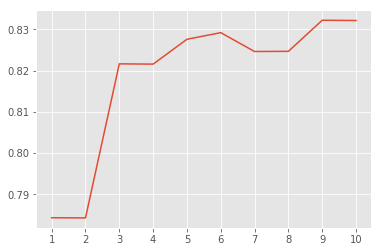

In [71]:
#test n_neighbors 

pred = []
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_x,train_y)
    pred.append(cv_score(model).mean())
n = list(range(1,11))
plt.plot(n,pred)
plt.xticks(range(1,11))
plt.show()

In [72]:
clf_knn = KNeighborsClassifier(n_neighbors=4)
clf_knn.fit(train_x,train_y)
acc_knn_train = cv_score(clf_knn).mean()
acc_knn_test = cv_score_test(clf_knn).mean()
print(acc_knn_train)
print(acc_knn_test)

0.8215619762151809
0.8029550159984943


In [73]:
#logistic regression

clf_LR = LogisticRegression()
clf_LR.fit(train_x,train_y)
acc_LR_train = cv_score(clf_LR).mean()
acc_LR_test = cv_score_test(clf_LR).mean()
print(acc_LR_train)
print(acc_LR_test)


0.833748370447229
0.8205439488048183


/home/baitong/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/baitong/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/baitong/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/baitong/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/baitong/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [74]:
clf_gb = GaussianNB()
clf_gb.fit(train_x,train_y)
acc_gb_train = cv_score(clf_gb).mean()
acc_gb_test = cv_score_test(clf_gb).mean()
print(acc_gb_train)
print(acc_gb_test)



0.8187751084151434
0.7992188970449841


In [75]:
n_estimators = range(100,1000,100)
grid = {'n_estimators':n_estimators}

clf_forest = GridSearchCV(RandomForestClassifier(random_state=0),param_grid=grid,verbose=True)
clf_forest.fit(train_x,train_y)
print(clf_forest.best_estimator_)
print(clf_forest.best_score_)
#print(cv_score(clf_forest).mean())
#print(cv_score_test(clf_forest).mean())


Fitting 3 folds for each of 9 candidates, totalling 27 fits


/home/baitong/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
0.8203592814371258


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   10.9s finished


In [76]:
clf_forest = RandomForestClassifier(n_estimators=200)
clf_forest.fit(train_x,train_y)
acc_forest_train = cv_score(clf_forest).mean()
acc_forest_test = cv_score_test(clf_forest).mean()
print(acc_forest_train)
print(acc_forest_test)


0.8201126719344455
0.8161961227178619


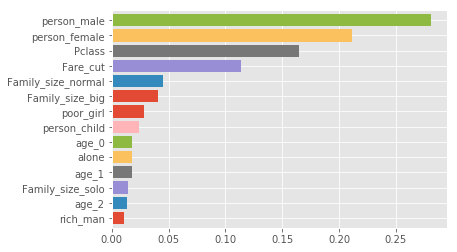

In [77]:
pd.Series(clf_forest.feature_importances_,train_x.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.show()

In [78]:
models = pd.DataFrame({
    'model':['SVM','Decision Tree','KNN','Logistic regression','Gaussion Bayes','Random Forest'],
    'score on train':[acc_svc_train,acc_tree_train,acc_knn_train,acc_LR_train,acc_gb_train,acc_forest_train],
    'score on test':[acc_svc_test,acc_tree_test,acc_knn_test,acc_LR_test,acc_gb_test,acc_forest_test]
})
models.sort_values(by='score on test', ascending=False)
'''
models = pd.DataFrame({
    'model':['SVM','Decision Tree','KNN','Logistic regression','Gaussion Bayes','Random Forest'],
    'score on train':[acc_svc_train,acc_tree_train,acc_knn_train,acc_LR_train,acc_gb_train,acc_forest_train]
})
'''
models.sort_values(by='score on test', ascending=False)

,model,score on test,score on train
3,Logistic regression,0.820544,0.833748
0,SVM,0.816196,0.829315
5,Random Forest,0.816196,0.820113
1,Decision Tree,0.811848,0.821628
2,KNN,0.802955,0.821562
4,Gaussion Bayes,0.799219,0.818775


In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
from sklearn.ensemble import BaggingClassifier
bag_tree = BaggingClassifier(base_estimator=clf_svc.best_estimator_,n_estimators=200,random_state=0)
bag_tree.fit(train_x,train_y)
acc_bagtree_train = cv_score(bag_tree).mean()
acc_bagtree_test =cv_score_test(bag_tree).mean()
print(acc_bagtree_train)
print(acc_bagtree_test)

0.829314656663208
0.8161961227178619


In [81]:
n_estimators = range(100,1000,100)
a = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
grid = {'n_estimators':n_estimators,'learning_rate':a}
ada = GridSearchCV(AdaBoostClassifier(),param_grid=grid,verbose=True,cv=3)
ada.fit(train_x,train_y)
print(ada.best_estimator_)
print(ada.best_score_)
#acc_ada_train = cv_score(ada).mean()
#acc_ada_test = cv_score_test(ada).mean()

#print(acc_ada_train)
#print(acc_ada_test)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)
0.8323353293413174


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  2.4min finished


In [82]:
ada = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.2)
ada.fit(train_x,train_y)

acc_ada_train = cv_score(ada).mean()
acc_ada_test = cv_score_test(ada).mean()

print(acc_ada_train)
print(acc_ada_test)

0.8337709846489476
0.81661020139281


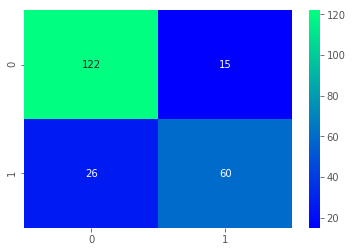

In [83]:
#confusion matrix to see the prediction

y_pred = cross_val_predict(ada,test_x,test_y,cv=10)
sns.heatmap(confusion_matrix(test_y,y_pred),cmap='winter',annot=True,fmt='2.0f')
plt.show()

In [84]:
n_estimators = range(100,1000,100)
a = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
grid = {'n_estimators':n_estimators,'learning_rate':a}
grad = GridSearchCV(GradientBoostingClassifier(),param_grid=grid,verbose=True,cv=3)
grad.fit(train_x,train_y)
print(grad.best_estimator_)
print(grad.best_score_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
0.8308383233532934


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  1.2min finished


In [85]:
clf_grad=GradientBoostingClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
clf_grad.fit(train_x,train_y)
acc_grad_train = cv_score(clf_grad).mean()
acc_grad_test = cv_score_test(clf_grad).mean()

print(acc_grad_train)
print(acc_grad_test)

0.8351743954026658
0.8122623753058535


In [86]:
from sklearn.metrics import precision_score
class Ensemble(object):

    def __init__(self,estimators):
        self.estimator_names = []
        self.estimators = []
        for i in estimators:
            self.estimator_names.append(i[0])
            self.estimators.append(i[1])
        self.clf = LogisticRegression()

    def fit(self, train_x, train_y):
        for i in self.estimators:
            i.fit(train_x,train_y)
        x = np.array([i.predict(train_x) for i in self.estimators]).T
        y = train_y
        self.clf.fit(x, y)

    def predict(self,x):
        x = np.array([i.predict(x) for i in self.estimators]).T
        #print(x)
        return self.clf.predict(x)


    def score(self,x,y):
        s = precision_score(y,self.predict(x))
        return s

In [87]:
ensem = Ensemble([('Ada',ada),('Bag',bag_tree),('SVM',clf_svc.best_estimator_),('LR',clf_LR),('gbdt',clf_grad)])
score = 0
for i in range(0,10):
    ensem.fit(train_x, train_y)
    sco = round(ensem.score(test_x,test_y) * 100, 2)
    score+=sco
print(score/10)

/home/baitong/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/baitong/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/baitong/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/baitong/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/baitong/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

85.0


In [88]:
#test_data = test_data.drop('Survived',axis=1)
#print(test_data)

In [91]:
test_data = test_data.drop('Survived',axis=1)
#print(test_data)
#pre = ensem.predict(test_data)
predict = ensem.predict(test_data)
#print(predict)
#pd.DataFrame({'PassengerId':passID,'Survived':pre})
submission = pd.DataFrame({'PassengerId':passID,'Survived':predict.astype(np.int32)})
submission.to_csv("/home/baitong/pywork/Titannic_Machine_Learnning/submission.csv", index=False)

KeyError: "['Survived'] not found in axis"

In [96]:
import tensorflow as tf
import random
#import Random

In [271]:
def add_layer(inputs,in_size,out_size,activation_function = None):
    #layer_name = "layer%s"%n_layer
    W = tf.Variable(tf.random_normal([in_size,out_size]),name = "W")
    biases = tf.Variable(tf.zeros([1,out_size]) + 0.1,name = "b")
    Wx_plus_b = tf.add(tf.matmul(inputs,W),biases)
    if activation_function is None:
        output =  Wx_plus_b
    else :
        output = activation_function(Wx_plus_b)
    return output
def compute_accuracy(v_xs,v_ys):
    err = 0
    length = len(v_ys)
    for i in range(length):
        if(v_xs[i]!=v_ys[i]):
            err+=1
    accuracy = (1-err/(len(v_ys)+1))
    return accuracy
def changeTolebal(result):
    out_data = []
    for i in result:
        if(i>0.5):
            out_data.append(1)
        else:
            out_data.append(0)
    return out_data

In [283]:
# train_x
# train_y
# print(test_data)
test_np = test_data.values
# print(test_np)
train_y = train_data['Survived'].values
train_np =train_data.drop(['Survived'],axis=1).values
# train_np = train_np[:, np.newaxis]
train_y = train_y[:, np.newaxis]
# print(train_np.shape)
# print(train_y.shape)

xs = tf.placeholder(tf.float32,[None,14],name = "x_input")
ys = tf.placeholder(tf.float32,[None,1],name = "y_input")

l1 = add_layer(xs,14,5,activation_function = tf.nn.relu)
prediction = add_layer(l1,5,1,activation_function = tf.nn.sigmoid)
# cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys*tf.log(prediction),
# 	reduction_indices = [1]))
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

result = 0
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(15000):
        sess.run(train_step,feed_dict={xs:train_np,ys:train_y})
        if i%100 == 0:
            print(sess.run(loss,feed_dict={xs:train_np,ys:train_y}))
    pre = sess.run(prediction,feed_dict={xs:train_np})
#     print(pre)
    res = changeTolebal(pre)
    print(res)
    ac = compute_accuracy(res,train_y)  
    print("accuracy:",ac)
    compel = pd.DataFrame({"label":train_data['Survived'].values,"pre":res})
#     print(compel)
    
    

0.57601625
0.19714741
0.18897186
0.18220665
0.17625228
0.17101684
0.16618064
0.16166629
0.15749207
0.1536747
0.15029885
0.14710361
0.14417383
0.1416463
0.13948186
0.13762574
0.1360777
0.13476661
0.13364813
0.1326878
0.13186233
0.13114838
0.13055517
0.1300316
0.12956282
0.12914057
0.12876625
0.12843162
0.12813106
0.1278625
0.12762159
0.1274018
0.12720042
0.12701516
0.1268441
0.12668377
0.12653205
0.1263902
0.12625615
0.12613073
0.12601241
0.1259002
0.12579328
0.12569132
0.12559396
0.12550077
0.12541188
0.12532653
0.12524436
0.12516509
0.12508833
0.12501357
0.124940984
0.12487034
0.12480146
0.12473351
0.12466626
0.124600366
0.12453562
0.12447187
0.124409094
0.12435223
0.124298394
0.124245845
0.12419452
0.12414436
0.124095306
0.124047264
0.12400023
0.12395412
0.12390888
0.123864494
0.12382091
0.12377807
0.12373587
0.1236949
0.123654984
0.1236157
0.123577066
0.12353901
0.12350153
0.12346473
0.1234285
0.12339281
0.12335762
0.12332293
0.123288706
0.12325491
0.12322153
0.123188555
0.12315592


In [237]:
tmp = pd.read_csv('/home/baitong/Data/all/test.csv')
submission = pd.DataFrame({'PassengerId':tmp['PassengerId'].values, 'Survived':out_data})
submission.to_csv("/home/baitong/pywork/Titannic_Machine_Learnning/submission.csv", index=False)
